In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sn

In [2]:
data=pd.read_csv("F:/ExcelR workings/Assignments/Clustering/EastWestAirlines.csv")

In [3]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
# Normaliziation function
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data_df=scaler.fit_transform(data.iloc[:,1:])

In [5]:
# How to find optimum number of cluster
# The K-means algorithm aims to choose centroids that minimise the interia, or within-cluster sum-of-squares criterion:

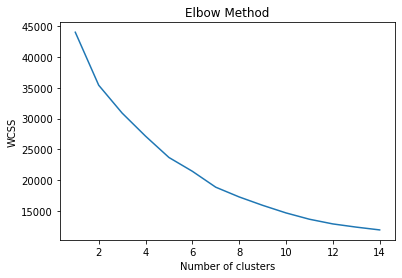

In [6]:
# wcss stands for within-cluster-sum-of-squares
wcss=[]
for i in range (1,15):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,15),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
wcss

[43989.000000000095,
 35409.533633091225,
 30899.271221785595,
 27161.537880165695,
 23706.857170841227,
 21472.931605405152,
 18891.92670311129,
 17316.782055953965,
 15960.424188770648,
 14729.017715096097,
 13706.528879960659,
 12947.24261514592,
 12429.165741434637,
 11976.521444499227]

In [11]:
# Build Cluster algorithm
from sklearn.cluster import KMeans
Cluster_new=KMeans(5,random_state=42)
Cluster_new.fit(scaled_data_df)

KMeans(n_clusters=5, random_state=42)

In [12]:
data['clusterid']=Cluster_new.labels_

In [13]:
data.groupby('clusterid').agg(['mean']).reset_index()

,clusterid,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2057.295082,119660.491803,5351.065574,2.000000,1.000000,1.000000,18683.475410,12.229508,963.639344,2.868852,3971.491803,0.557377
1,1,2236.817102,43570.894299,42.315519,1.226049,1.019398,1.000396,4737.252573,6.955661,199.646081,0.622328,3705.155582,0.201504
2,2,1598.558400,117547.505600,59.515200,3.710400,1.002400,1.001600,39367.885600,18.807200,346.607200,1.034400,4889.987200,0.649600
3,3,1757.802721,190251.952381,458.734694,2.224490,1.040816,1.000000,32907.979592,28.231293,5685.823129,16.523810,4673.081633,0.802721
4,4,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
